## Assignment # 4 - Data Preparation.
## Data Science 450

Consider the data collected by a hypothetical video store for 50 regular customers. This data consists of a table which, for each customer, records the following attributes: 
- Gender 
- Income 
- Age 
- Rentals : Total number of video rentals in the past year 
- Avg. per visit: Average number of video rentals per visit during the past year 
- Incidentals : Whether the customer tends to buy incidental items such as refreshments when renting a video 
- Genre - The customer's preferred movie genre

Answer the following questions:

- Use smoothing by bin means to smooth the values of the Age attribute. Use a bin depth of 4. 
- Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0]. 
        -- Please refer the attached videostorAtoD.csv.
- Use z-score normalization to standardize the values of the Rentals attribute. 
        -- Please refer the attached videostorAtoD.csv.
- Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than 25K 
        -- Please refer the attached videostorAtoD.csv.
- Convert the original data (not the results of parts a-d) into the standard spreadsheet format (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged). 
        -- Please refer the attached videostorAtoD.csv.
- Using the standardized data set (from part e), perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You need to construct a complete Correlation Matrix (Please read the brief document Basic Correlation Analysis (see course website) for more detail). Can you observe any "significant" patterns among groups of two or more variables? Explain.
        -- Please refer the attached videostorEtoI.csv.
        -- Low income group rents the highest number of videos.
        -- Females watch more of drama and men watch more of action.
- Perform a cross-tabulation of the two "gender" variables versus the three "genre" variables. Show this as a 2 x 3 table with entries representing the total counts. Then, use a graph or chart that provides the best visualization of the relationships between these sets of variables. Can you draw any significant conclusions? 
        -- Females watch more of drama and men watch more of action.
- Select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes. Can you observe any significant patterns that characterize this segment of customers? Explain. Note: To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.
        -- Good customers tend to watch more movies of drama genre followed by action genre.
        -- Females rent the highest number of vides in the category of good customers.
        -- Mean income of good customers is lower than the general customers.
        -- Mean age of good customers is lower than the general customers.
        -- Mean rentals of good customers are higher than general customers.
        -- Mean Avg.Per.Visit of good customers is slightly higher than general customers, median value however is lower for good customers.
- Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished (e.g., should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.).Explain your answer based on your analysis of the data.
        -- More movies with action genre should increase the incidentals.

## Load & examine the data set.

The function shown in the cell below loads the data from the .csv file. 
Execute the code in this cell to load the data into your notebook. Make sure you have the **.csv file** in your working directory!.

In [59]:
# Clear Workspace
rm(list=ls())
# Clear Console:
cat("\014")
library(ggplot2)
library(reshape2)
Loaddata <- function(file)
{
  #browser()
  ## Read the csv file
  Dataload <- read.csv(file, header = TRUE,stringsAsFactors = FALSE)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  Dataload[complete.cases(Dataload), ]
  return(Dataload)
}

### About the data set.

Hypotheical data for a video store has been provided as part of this assignment.

## Create functions used in this assignment.

In [60]:
#MinMax Function
MinMax <- function(Column)
{
  x <- Column
  y <- 1000*x
  a <- min(x)
  b <- max(x) - min(x)
  minmaxnormalized <- (x - a) / b
  return(minmaxnormalized)
}
#Discretize Function
Discretize <- function(Column)
{
  #browser()
  x1 <- Column
  range <- max(x1) - min(x1)
  binWidth <- range / 3
  bin1Min <- -Inf
  bin1Max <- min(x1) + binWidth
  bin2Max <- min(x1) + 2*binWidth
  bin3Max <- min(x1) + 3*binWidth
  bin4Max <- Inf

  xDiscretized <- rep(NA, length(x1))
  
  xDiscretized[bin1Min < x1 & x1 <= bin1Max] <- "Low"
  xDiscretized[bin1Max < x1 & x1 <= bin2Max] <- "Medium"
  xDiscretized[bin2Max < x1 & x1 <= bin4Max] <- "High"
  #xDiscretized[bin3Max < x1 & x1 <= bin4Max] <- "Very High"
  
  return(xDiscretized)
}

## Load the file.
I am now calling the function "LoadData" to load the Video_Store.csv file.

In [61]:
# Load the file.
videostore <- Loaddata('Video_Store.csv')

## Check data structure.

In [62]:
str(videostore)

'data.frame':	50 obs. of  8 variables:
 $ Cust.ID      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender       : chr  "M" "F" "F" "F" ...
 $ Income       : int  45000 54000 32000 59000 37000 18000 29000 74000 38000 65000 ...
 $ Age          : int  25 33 20 70 35 20 45 25 21 40 ...
 $ Rentals      : int  27 12 42 16 25 33 19 31 18 21 ...
 $ Avg.Per.Visit: num  2.5 3.4 1.6 4.2 3.2 1.7 3.8 2.4 2.1 3.3 ...
 $ Incidentals  : chr  "Yes" "No" "No" "Yes" ...
 $ Genre        : chr  "Action" "Drama" "Comedy" "Drama" ...


### View the Head.

In [63]:
head(videostore)

Cust.ID,Gender,Income,Age,Rentals,Avg.Per.Visit,Incidentals,Genre
1,M,45000,25,27,2.5,Yes,Action
2,F,54000,33,12,3.4,No,Drama
3,F,32000,20,42,1.6,No,Comedy
4,F,59000,70,16,4.2,Yes,Drama
5,M,37000,35,25,3.2,Yes,Action
6,M,18000,20,33,1.7,No,Action


## Check the summary of the data frame.

In [64]:
lapply(videostore, summary)

$Cust.ID
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.25   25.50   25.50   37.75   50.00 

$Gender
   Length     Class      Mode 
       50 character character 

$Income
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000   26750   41000   42300   56750   89000 

$Age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   22.00   30.00   31.56   37.50   70.00 

$Rentals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   19.00   25.00   26.24   32.75   48.00 

$Avg.Per.Visit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   2.125   2.750   2.748   3.375   4.700 

$Incidentals
   Length     Class      Mode 
       50 character character 

$Genre
   Length     Class      Mode 
       50 character character 


## Data Visualization

Using Gender, Incidentals, Genre as id variables


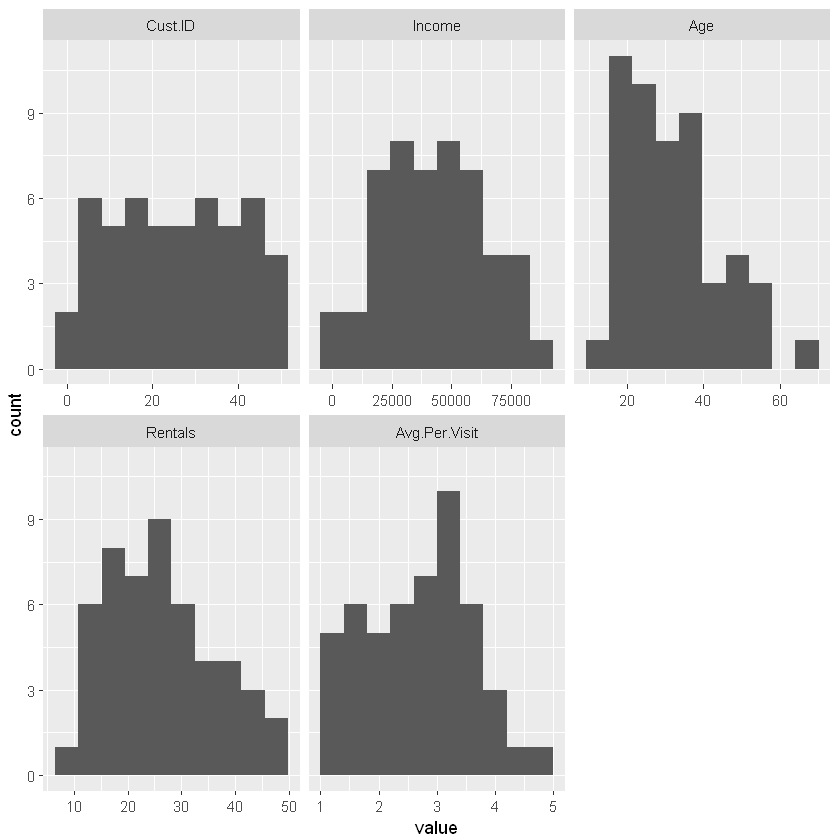

In [65]:
ggplot(data = melt(videostore), mapping = aes(x = value)) + 
  geom_histogram(bins = 10) + facet_wrap(~variable, scales = 'free_x')

## Min Max Normalization Of Numeric Columns

In [66]:
#Income
minmaxnormalized<- MinMax(videostore$Income)
videostore$minmaxIncome <- minmaxnormalized
#Age
minmaxnormalized<- MinMax(videostore$Age)
videostore$minmaxAge <- minmaxnormalized
#Rentals
minmaxnormalized<- MinMax(videostore$Rentals)
videostore$minmaxRentals <- minmaxnormalized
#Avg.Per.Visit
minmaxnormalized<- MinMax(videostore$Avg.Per.Visit)
videostore$minmaxAvgPerVisit <- minmaxnormalized

## z-Score Normalizaition of Rentals

In [67]:
videostore$zScoreRental <- scale(videostore$Rentals)

## Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than 25K

In [68]:
#Income
xDiscretized <- Discretize(videostore$Income)
videostore$IncomeBin <- xDiscretized
#Age
xDiscretized <- Discretize(videostore$Age)
videostore$AgeBin <- xDiscretized

## Write dataframe to a csv file upto this point.

In [69]:
#Write dataframe to a csv file (A to D).
write.csv(videostore, file = "videostorAtoD.csv")

## Convert the original data (not the results of parts a-d) into the standard spreadsheet format (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged).

In [70]:
# Unique Genre values.
unique(videostore$Genre)
# Binarize.
videostore$BinarizedGender <- ifelse(videostore$Gender == 'M',1,0)
videostore$BinarizedGenre <- ifelse(videostore$Genre == 'Action',1,(ifelse(videostore$Genre == 'Drama',2,3)))
# Check the header data after binarizing the categorical variables.
head(videostore)

[1] "Action" "Drama"  "Comedy"

Cust.ID,Gender,Income,Age,Rentals,Avg.Per.Visit,Incidentals,Genre,minmaxIncome,minmaxAge,minmaxRentals,minmaxAvgPerVisit,zScoreRental,IncomeBin,AgeBin,BinarizedGender,BinarizedGenre
1,M,45000,25,27,2.5,Yes,Action,0.5000000,0.18181818,0.46153846,0.3888889,0.07579055,Medium,Low,1,1
2,F,54000,33,12,3.4,No,Drama,0.6022727,0.32727273,0.07692308,0.6388889,-1.42007558,Medium,Low,0,2
3,F,32000,20,42,1.6,No,Comedy,0.3522727,0.09090909,0.84615385,0.1388889,1.57165668,Medium,Low,0,3
4,F,59000,70,16,4.2,Yes,Drama,0.6590909,1.00000000,0.17948718,0.8611111,-1.02117795,Medium,High,0,2
5,M,37000,35,25,3.2,Yes,Action,0.4090909,0.36363636,0.41025641,0.5833333,-0.12365827,Medium,Medium,1,1
6,M,18000,20,33,1.7,No,Action,0.1931818,0.09090909,0.61538462,0.1666667,0.67413700,Low,Low,1,1


## Using the standardized data set (from part e), perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You need to construct a complete Correlation Matrix (Please read the brief document Basic Correlation Analysis (see course website) for more detail). Can you observe any "significant" patterns among groups of two or more variables? Explain.

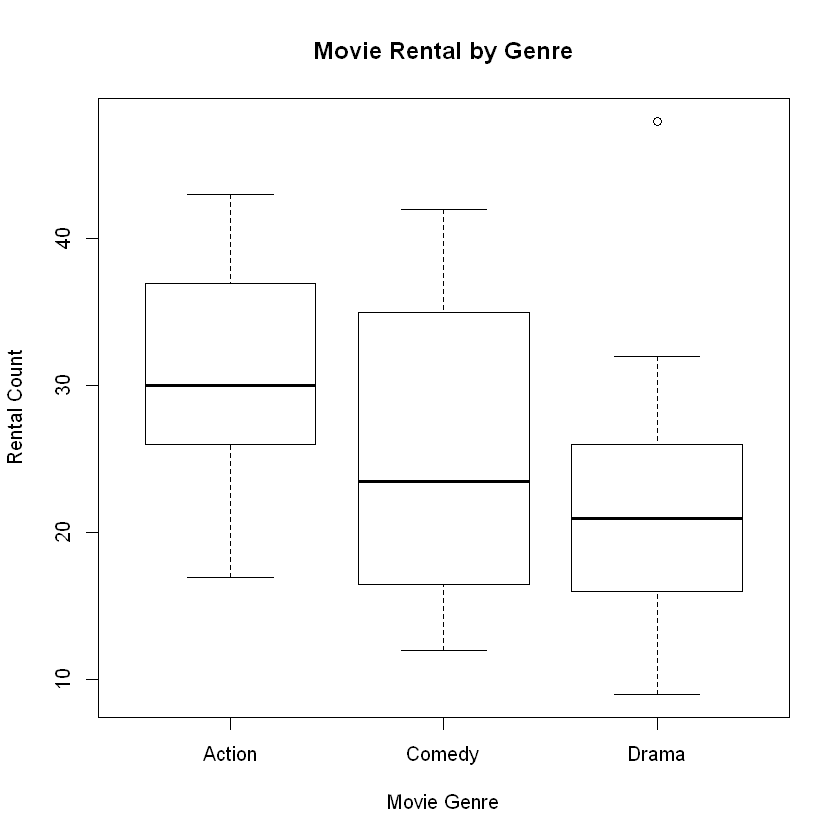

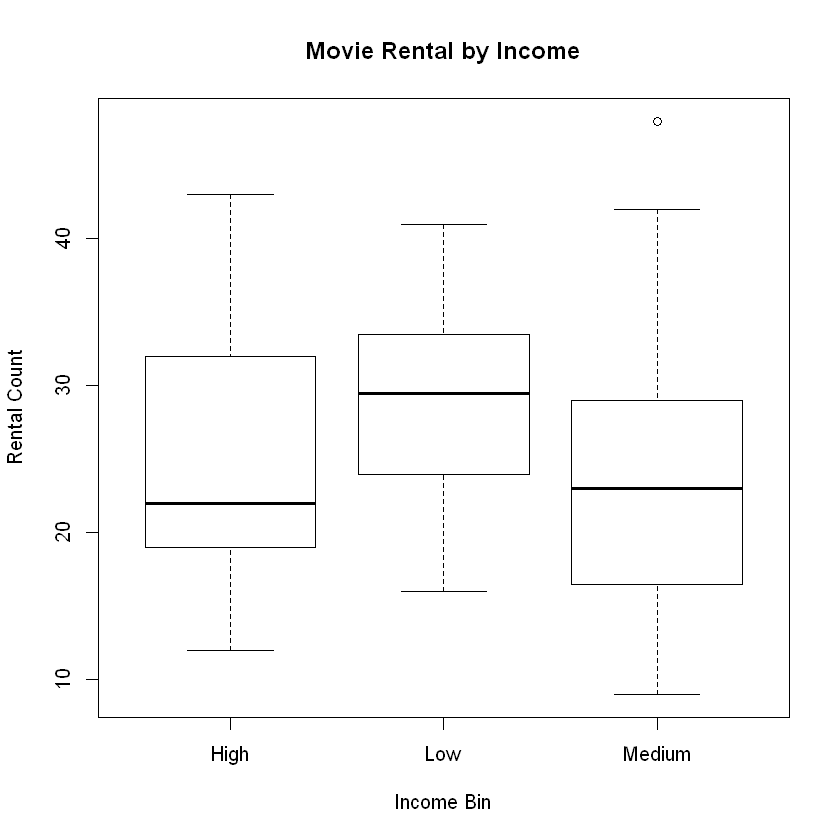

In [71]:
# Boxplot of Movie Rental By Genre.
boxplot(Rentals~Genre,data=videostore, main="Movie Rental by Genre",
        xlab="Movie Genre", ylab="Rental Count") 
# Action genre is popular in the general population.
# Boxplot of Movie Rental By Income.
boxplot(Rentals~IncomeBin,data=videostore, main="Movie Rental by Income",
        xlab="Income Bin", ylab="Rental Count") 
#Low income group rents the highest number of videos.

## Perform a cross-tabulation of the two "gender" variables versus the three "genre" variables. Show this as a 2 x 3 table with entries representing the total counts.

In [72]:
table(videostore$Gender,videostore$Genre)
#Females watch more of drama and men watch more of action.

   
    Action Comedy Drama
  F      5      6    13
  M     13      6     7

## Use a graph or chart that provides the best visualization of the relationships between these sets of variables. Can you draw any significant conclusions?

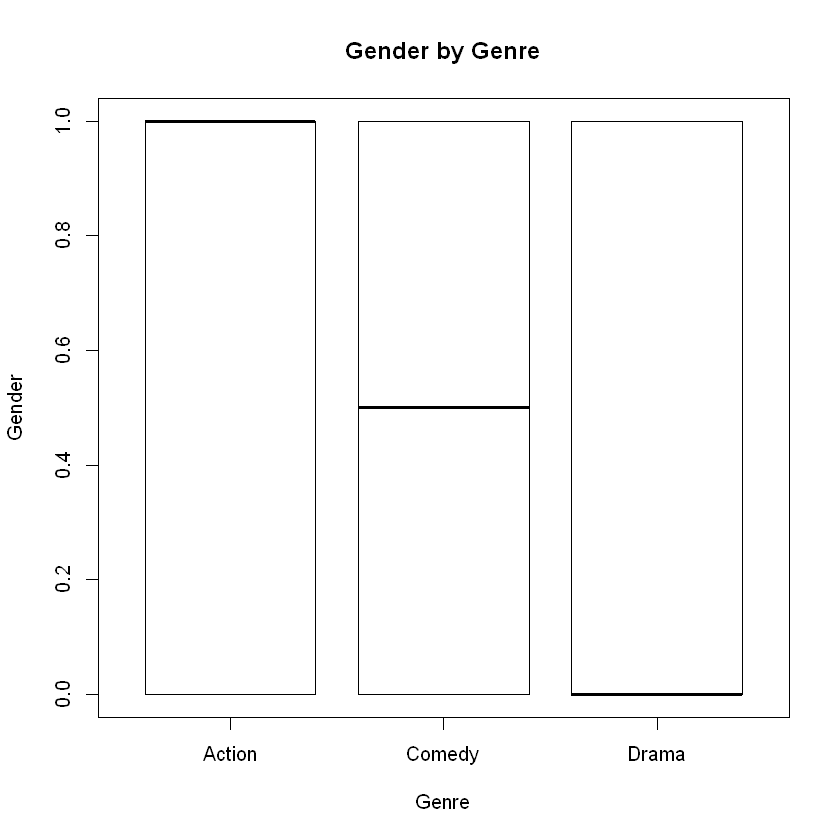

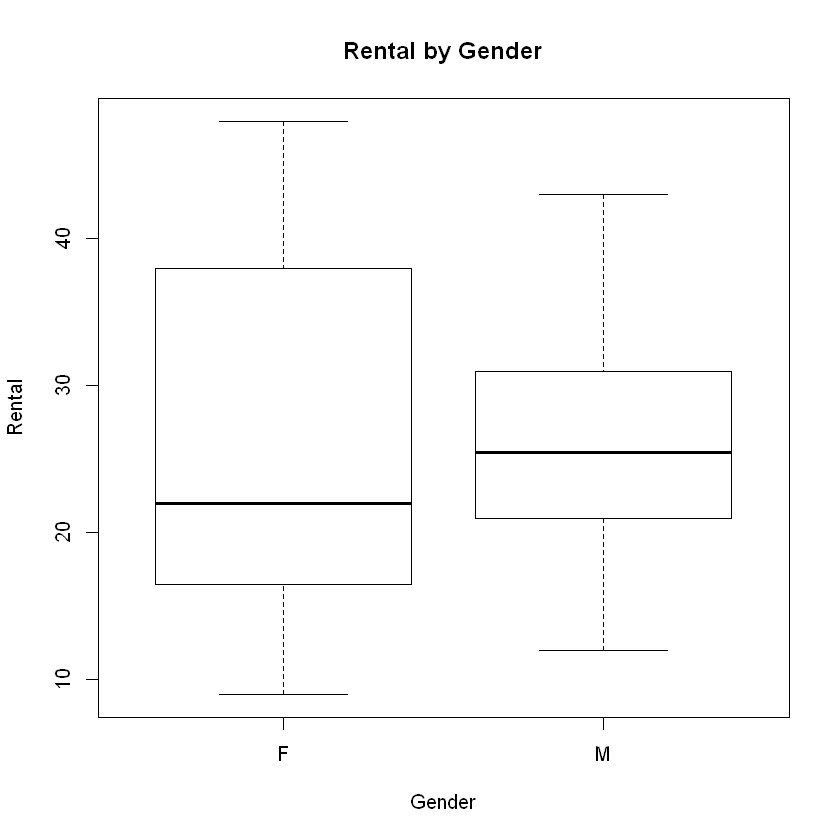

In [73]:
# Boxplot of Gender by Genre
boxplot(BinarizedGender~Genre,data=videostore, main="Gender by Genre",
        xlab="Genre", ylab="Gender")
#Females watch more of drama and men watch more of action.

# Boxplot of Gender by rental
boxplot(Rentals~Gender,data=videostore, main="Rental by Gender",
        xlab="Gender", ylab="Rental")
#In general population Males watch more videos.

## Select good customers.


In [74]:
#Get good customers.
videostoregoodcust <- videostore[videostore$Rentals >= 30,]

## Summary of good customer.

In [75]:
#Check the summary of general customers.
lapply(videostore, summary)

$Cust.ID
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.25   25.50   25.50   37.75   50.00 

$Gender
   Length     Class      Mode 
       50 character character 

$Income
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000   26750   41000   42300   56750   89000 

$Age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   22.00   30.00   31.56   37.50   70.00 

$Rentals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   19.00   25.00   26.24   32.75   48.00 

$Avg.Per.Visit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   2.125   2.750   2.748   3.375   4.700 

$Incidentals
   Length     Class      Mode 
       50 character character 

$Genre
   Length     Class      Mode 
       50 character character 

$minmaxIncome
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2926  0.4545  0.4693  0.6335  1.0000 

$minmaxAge
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1273  0.2727  0.3011  0.4091  1.0000 

$minmaxRentals
   M

## Select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes. Can you observe any significant patterns that characterize this segment of customers? Explain.

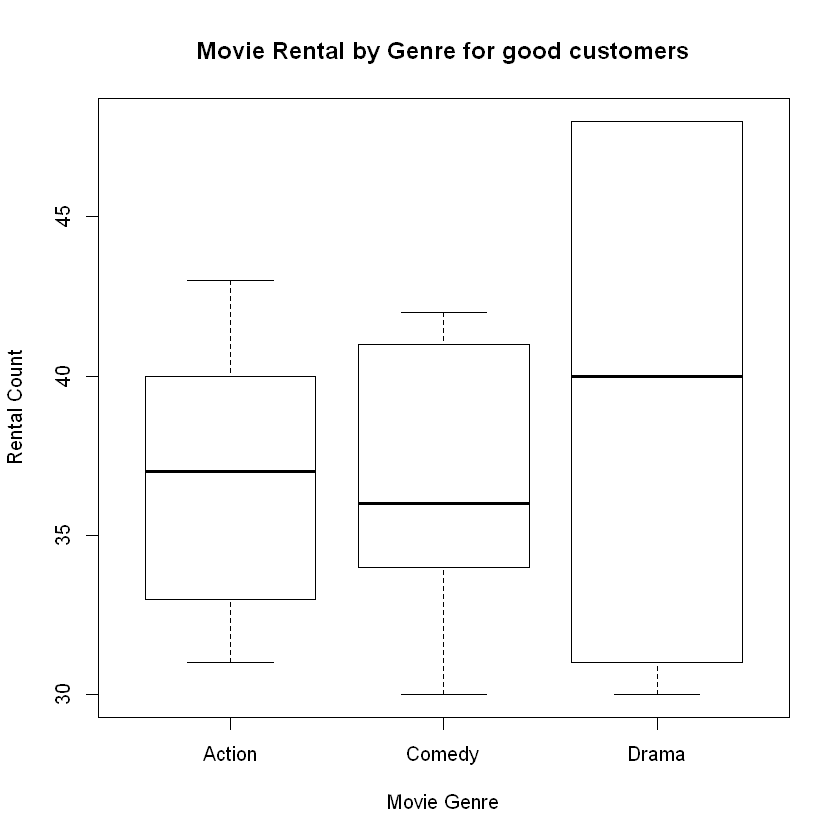

$Cust.ID
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   15.75   26.50   26.83   39.00   50.00 

$Gender
   Length     Class      Mode 
       18 character character 

$Income
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2000   19500   31500   37670   56000   74000 

$Age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   20.00   23.50   25.17   28.75   47.00 

$Rentals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   32.25   36.50   37.28   41.75   48.00 

$Avg.Per.Visit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.600   2.150   2.550   2.778   3.375   4.700 

$Incidentals
   Length     Class      Mode 
       18 character character 

$Genre
   Length     Class      Mode 
       18 character character 

$minmaxIncome
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01136 0.21020 0.34660 0.41670 0.62500 0.82950 

$minmaxAge
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.09091 0.15450 0.18480 0.25000 0.58180 

$minmaxRentals
   M

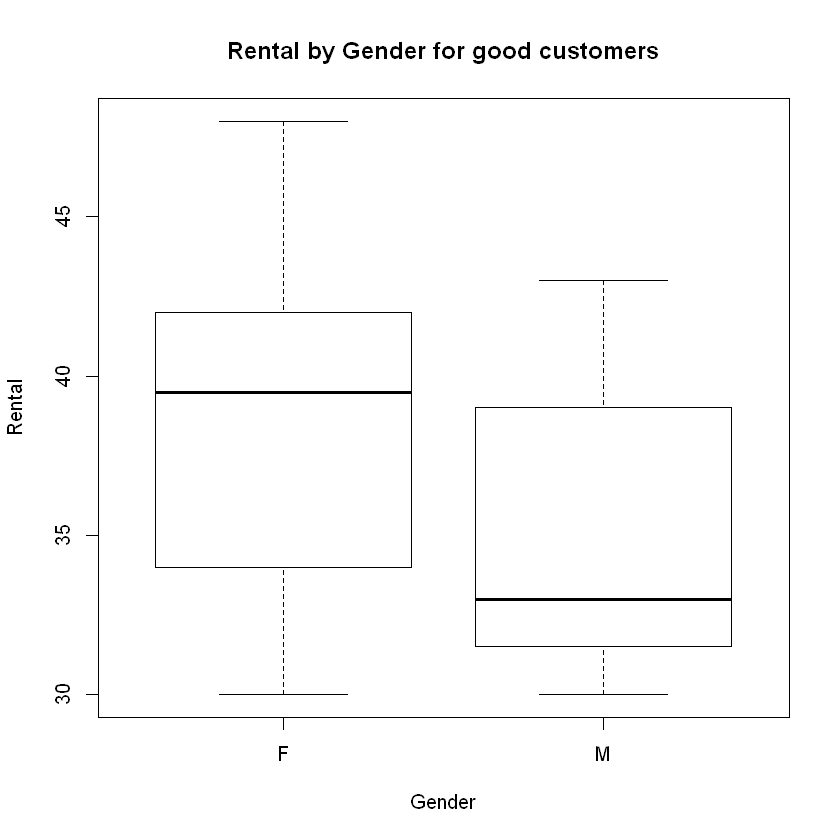

In [76]:
# Boxplot of Movie Rental By Genre.
boxplot(Rentals~Genre,data=videostoregoodcust, main="Movie Rental by Genre for good customers",
        xlab="Movie Genre", ylab="Rental Count") 
#Good customers tend to watch more movies of drama genre followed by action genre.
# Boxplot of Gender by rental
boxplot(Rentals~Gender,data=videostoregoodcust, main="Rental by Gender for good customers",
        xlab="Gender", ylab="Rental")
#Females rent the highest number of vides in the category of good customers.
#Check the summary of good customers.
lapply(videostoregoodcust, summary)
#Mean income of good customers is lower than the general customers.
#Mean age of good customers is lower than the general customers.
#Mean rentals of good customers are higher than general customers.
#Mean Avg.Per.Visit of good customers is slightly higher than general customers, median value however is lower for good customers.


## Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished (e.g., should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

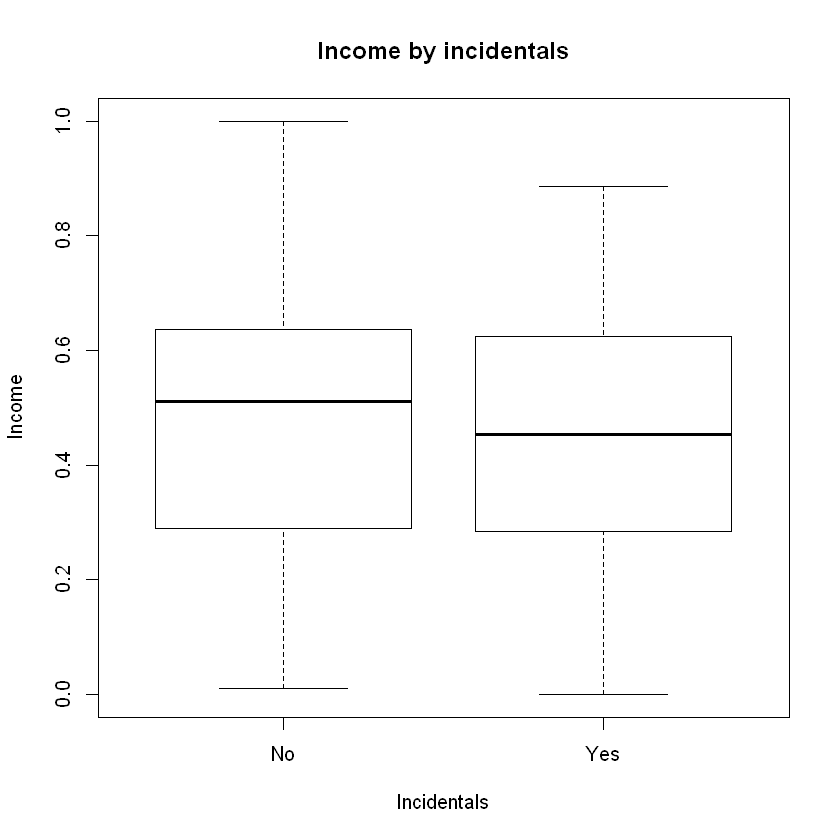

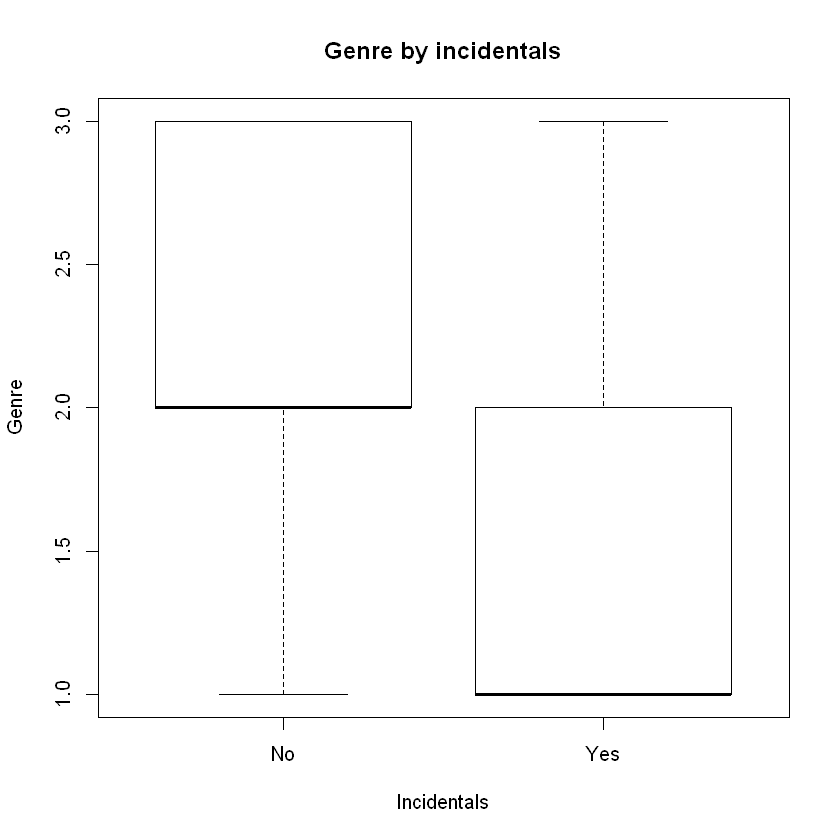

In [77]:
# Boxplot of income by incidentals
boxplot(minmaxIncome~Incidentals,data=videostore, main="Income by incidentals",
        xlab="Incidentals", ylab="Income") 
#Income does not affect the incidentals.
# Boxplot of Genre by incidentals
boxplot(BinarizedGenre~Incidentals,data=videostore, main="Genre by incidentals",
        xlab="Incidentals", ylab="Genre") 
#More movies with action genre should increase the incidentals.

## Write dataframe to a csv file for good customers. 

In [78]:

#Write dataframe to a csv file(E to I).
write.csv(videostoregoodcust, file = "videostoreEtoI.csv")